In [ ]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

np.random.seed(42)
plt.style.use('../style.mpl')

In [4]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 780 nodes and 30052 edges


In [ ]:
eccentricity = nx.eccentricity(G)
periphery = nx.periphery(G)
radius = nx.radius(G)
# the diameter of networks is the maximum eccentricy
diameter = nx.diameter(G)
degree = nx.degree(G)

harmonic_centrality = nx.harmonic_centrality(G)
degree_centrality = nx.degree_centrality(G)
weighted_degree_centrality = dict(G.degree(weight='weight'))
closeness_centrality =  nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

print(f"Eccentricity: {eccentricity}")
print(f"Periphery: {periphery}")
print(f"Radius: {radius}")
print(f"Diameter: {diameter}")
print(f"Degree: {degree}")
print(f"Degree Centrality: {degree_centrality}")
print(f"Closeness Centrality: {closeness_centrality}")
print(f"Betweenness Centrality: {betweenness_centrality}")
print(f"Eigenvector Centrality: {eigenvector_centrality}")

Eccentricity: {'Chris Brown': 3, 'Usher': 3, 'Ne-Yo': 4, 'Joe': 4, 'Brian McKnight': 4, 'Boyz II Men': 4, 'Babyface': 4, 'Mario': 3, 'Mint Condition': 4, 'DAY26': 4, 'Musiq Soulchild': 4, 'Weezer': 3, 'Modern Baseball': 3, 'Red Hot Chili Peppers': 3, 'Jesse Marchant': 3, 'The Hundred Acre Woods': 3, 'Jake Shimabukuro': 3, 'The White Stripes': 3, 'Beck': 3, 'Arctic Monkeys': 3, 'HONNE': 3, 'Total Science': 3, 'Kings of Leon': 3, 'Foo Fighters': 3, 'Pearl Jam': 3, 'The Pretty Reckless': 3, 'Fall Out Boy': 3, 'Oh Wonder': 3, 'Pentatonix': 3, 'Daft Punk': 3, 'Nine Inch Nails': 3, 'Rage Against The Machine': 3, 'Soundgarden': 3, 'blink-182': 3, 'The Lawrence Arms': 3, 'Panic! At The Disco': 3, 'My Chemical Romance': 3, 'Paramore': 3, 'Transit': 3, 'DJ Qbert': 3, 'Allie X': 3, 'Bombay Bicycle Club': 3, 'Catfish and the Bottlemen': 3, 'N.E.R.D': 3, 'Green Day': 4, 'Sum 41': 4, 'New Found Glory': 4, 'The Offspring': 4, 'AFI': 4, 'Good Charlotte': 4, 'Simple Plan': 3, 'The All-American Rejects'

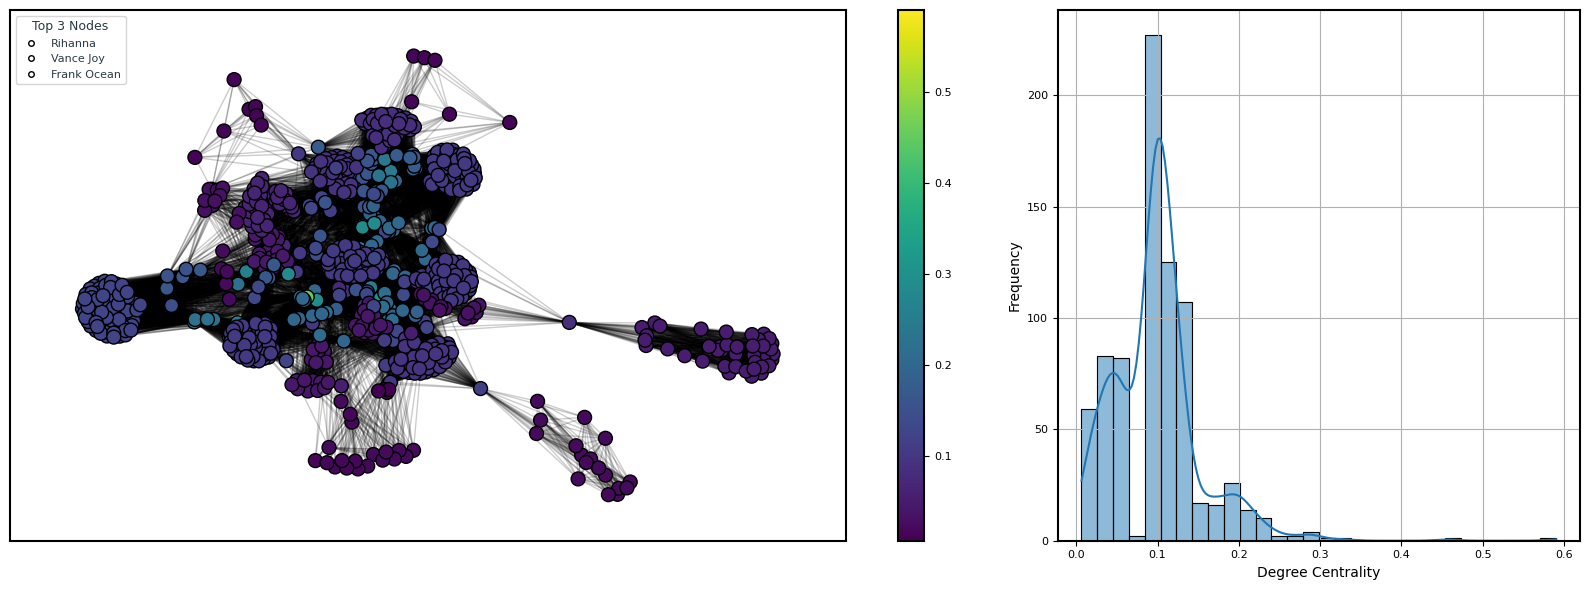

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

degree_centrality_values = list(degree_centrality.values())

pos_degree_centrality = nx.spring_layout(G, seed=42, k=0.3)
color = list(dict(degree_centrality).values())

nx.draw_networkx_edges(G, pos=pos_degree_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_degree_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_3_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

legend_handles = [
    mpl.lines.Line2D([0], [0], label=node, marker='o', markerfacecolor='w', markersize=4, markeredgecolor='black', linestyle='None')
    for node, _ in top_3_nodes
]
axes[0].legend(handles=legend_handles, title='Top 3 Nodes', loc='upper left', fontsize=8, frameon=True)

sns.histplot(degree_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Degree Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/degree-centrality.png", transparent=True)
plt.show()

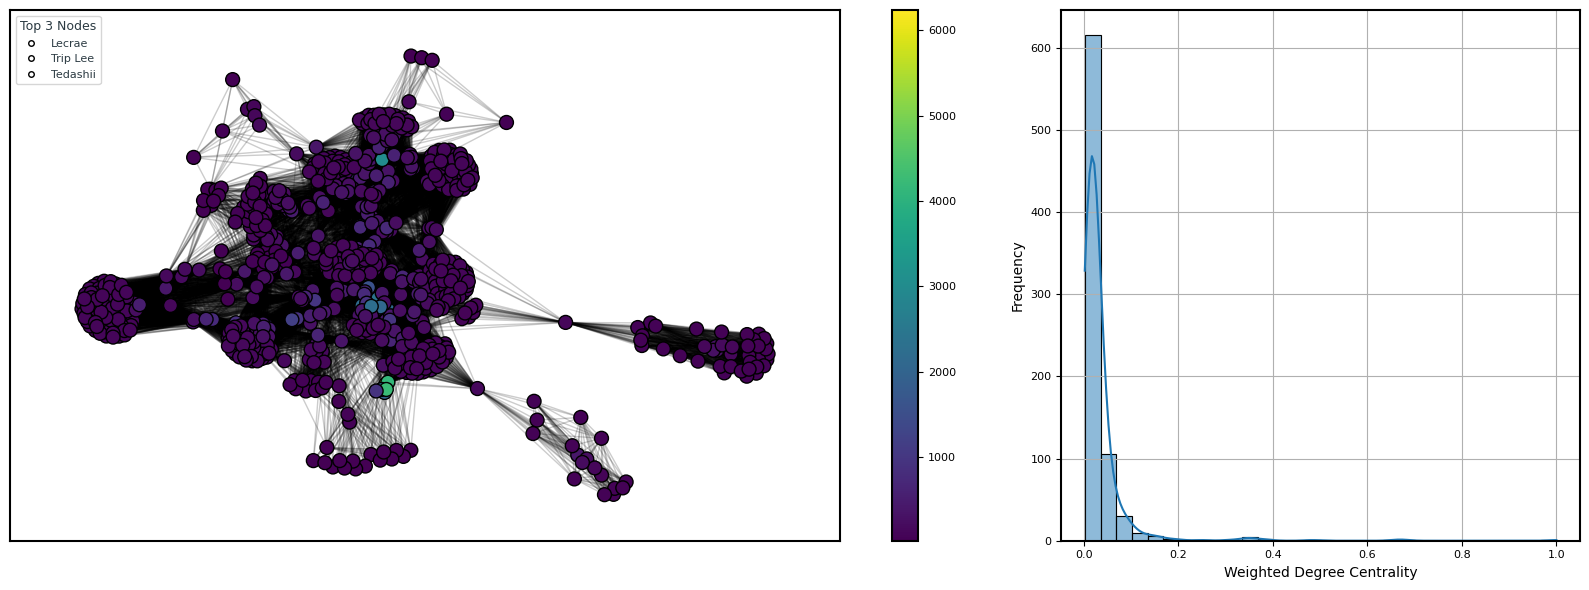

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_degree_centrality = nx.spring_layout(G, seed=42, k=0.3)
color = list(dict(weighted_degree_centrality).values())

nx.draw_networkx_edges(G, pos=pos_degree_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_degree_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_3_nodes = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

weighted_degree_centrality_values = list(weighted_degree_centrality.values())
max_weighted_degree_centrality = max(weighted_degree_centrality_values)
weighted_degree_centrality_values = [v / max_weighted_degree_centrality for v in weighted_degree_centrality_values]

sns.histplot(weighted_degree_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Weighted Degree Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

legend_handles = [
    mpl.lines.Line2D([0], [0], label=node, marker='o', markerfacecolor='w', markersize=4, markeredgecolor='black', linestyle='None')
    for node, _ in top_3_nodes
]
axes[0].legend(handles=legend_handles, title='Top 3 Nodes', loc='upper left', fontsize=8, frameon=True)

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/weighted-degree-centrality.png", transparent=True)
plt.show()

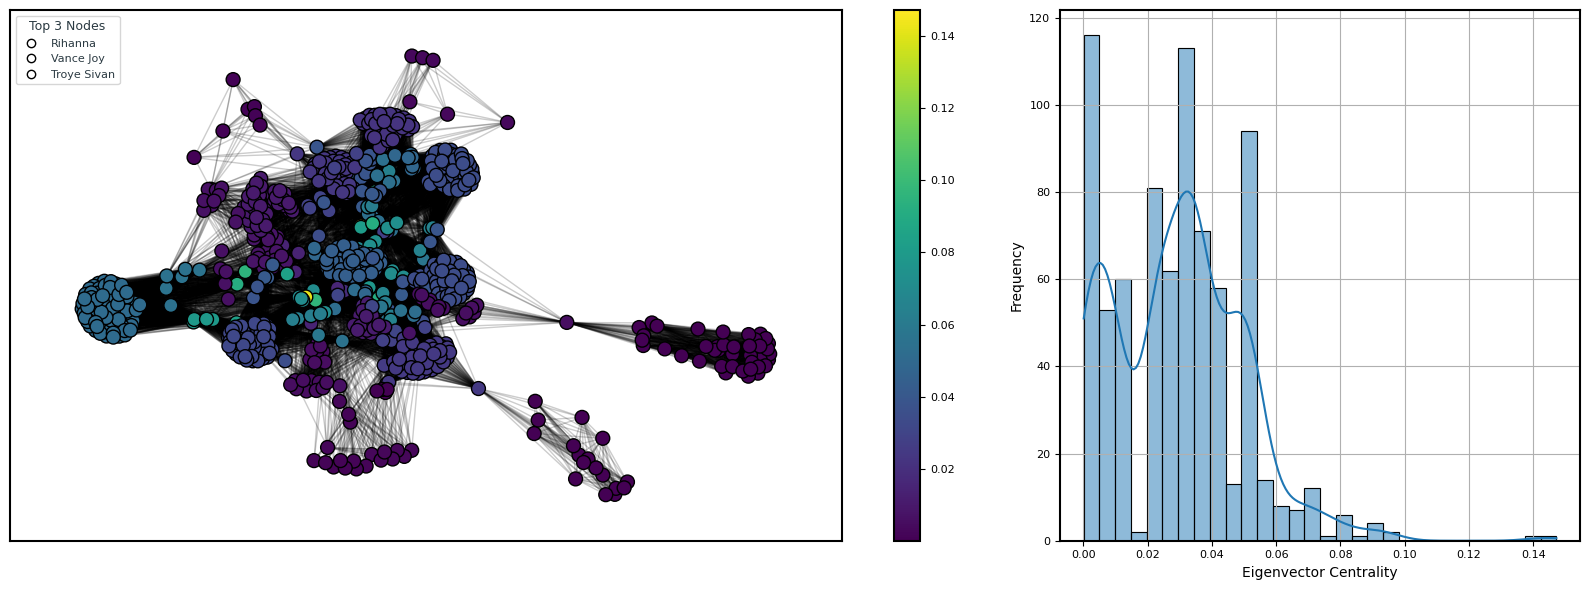

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_degree_centrality = nx.spring_layout(G, seed=42, k=0.3)
color = list(dict(eigenvector_centrality).values())

nx.draw_networkx_edges(G, pos=pos_degree_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_degree_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_3_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
legend_handles = [
    mpl.lines.Line2D([0], [0], label=node, marker='o', markerfacecolor='w', markersize=6, markeredgecolor='black', linestyle='None')
    for node, _ in top_3_nodes
]
axes[0].legend(handles=legend_handles, title='Top 3 Nodes', loc='upper left', fontsize=8, frameon=True)

eigenvector_centrality_values = list(eigenvector_centrality.values())

sns.histplot(eigenvector_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Eigenvector Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/eigenvector-centrality.png", transparent=True)
plt.show()

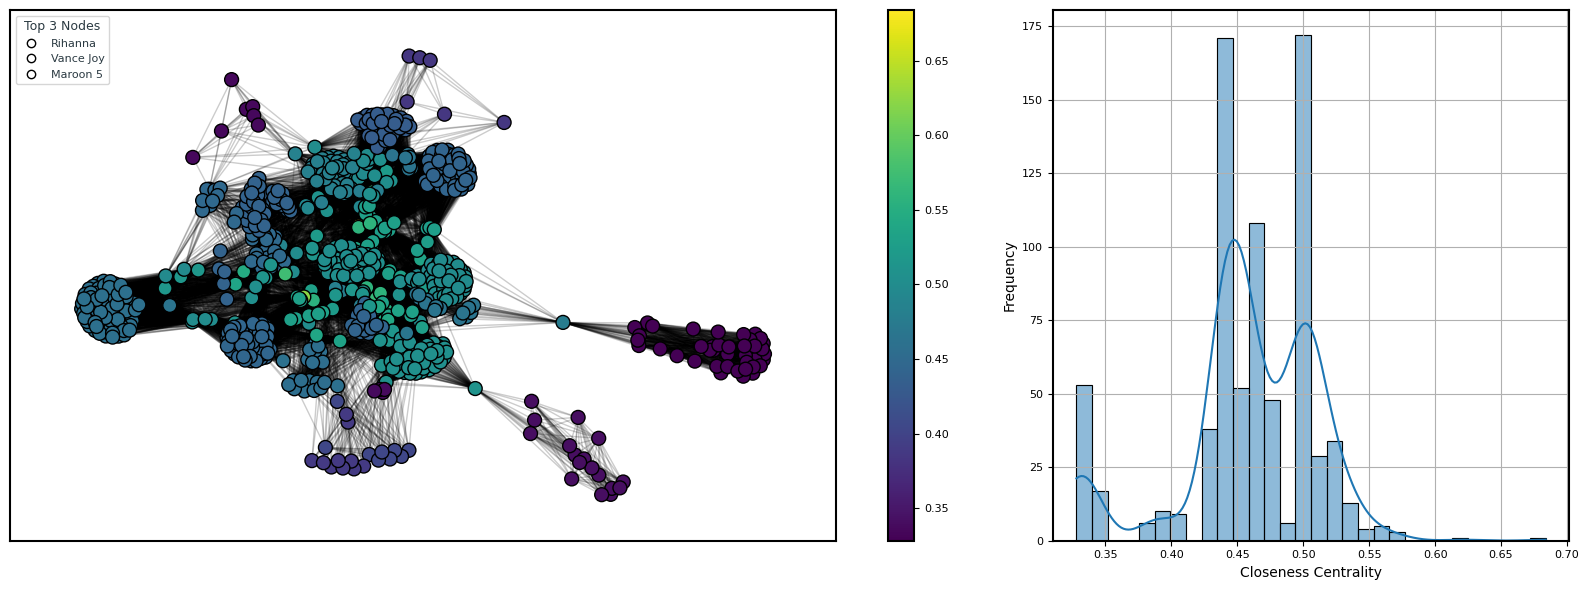

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_closeness_centrality = nx.spring_layout(G, seed=42, k=0.3)
color = list(dict(closeness_centrality).values())

nx.draw_networkx_edges(G, pos=pos_closeness_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_closeness_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_3_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
legend_handles = [
    mpl.lines.Line2D([0], [0], label=node, marker='o', markerfacecolor='w', markersize=6, markeredgecolor='black', linestyle='None')
    for node, _ in top_3_nodes
]
axes[0].legend(handles=legend_handles, title='Top 3 Nodes', loc='upper left', fontsize=8, frameon=True)

closeness_centrality_values = list(closeness_centrality.values())

sns.histplot(closeness_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Closeness Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/closeness-centrality.png", transparent=True)
plt.show()

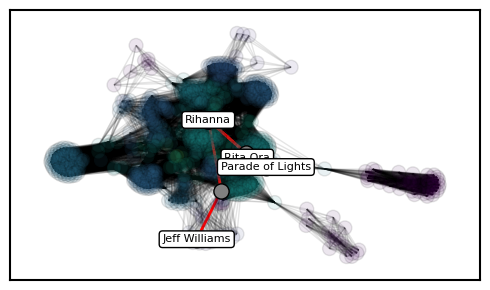

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))

pos = nx.spring_layout(G, seed=42, k=0.3)
node_centrality = dict(closeness_centrality)
color = list(node_centrality.values())

nx.draw_networkx_edges(G, pos=pos, alpha=0.1)
nx.draw_networkx_nodes(
    G, pos=pos, node_color=color, cmap=plt.cm.viridis,
    edgecolors='black', node_size=100, alpha=0.1
)

top_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

valid_targets = [
    n for n in G.nodes()
    if n != top_node and len(nx.shortest_path(G, source=top_node, target=n)) > 2
]

random_targets = np.random.choice(valid_targets, size=3)

nx.draw_networkx_nodes(
    G, pos=pos, nodelist=[top_node], node_color='blue',
    edgecolors='black', node_size=160, alpha=1
)

nx.draw_networkx_nodes(
    G, pos=pos, nodelist=random_targets, node_color='green',
    edgecolors='black', node_size=140, alpha=1
)

intermediary_nodes = set()
for target in random_targets:
    path = nx.shortest_path(G, source=top_node, target=target)
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=2)
    intermediary_nodes.update(path[1:-1])

intermediary_nodes -= set([top_node])
intermediary_nodes -= set(random_targets)

nx.draw_networkx_nodes(
    G, pos=pos, nodelist=list(intermediary_nodes),
    node_color='gray', edgecolors='black', node_size=120, alpha=1
)

labels = {top_node: str(top_node)}
labels.update({target: str(target) for target in random_targets})

nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=8, verticalalignment='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("../plots/closeness-centrality-sp.png", transparent=True)
plt.show()

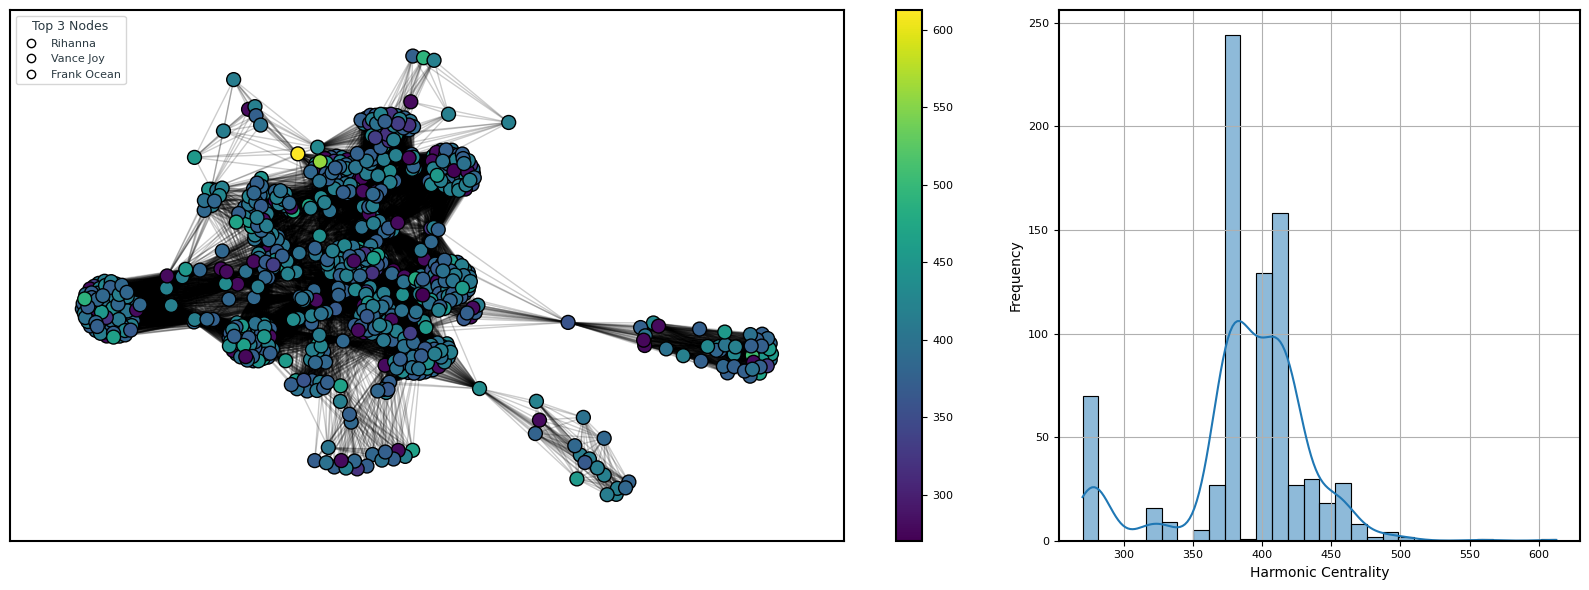

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_harmonic_centrality = nx.spring_layout(G, seed=42, k=0.3)
color = list(dict(harmonic_centrality).values())

nx.draw_networkx_edges(G, pos=pos_harmonic_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_harmonic_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_3_nodes = sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
legend_handles = [
    mpl.lines.Line2D([0], [0], label=node, marker='o', markerfacecolor='w', markersize=6, markeredgecolor='black', linestyle='None')
    for node, _ in top_3_nodes
]
axes[0].legend(handles=legend_handles, title='Top 3 Nodes', loc='upper left', fontsize=8, frameon=True)

harmonic_centrality_values = list(harmonic_centrality.values())

sns.histplot(harmonic_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Harmonic Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/harmonic-centrality.png", transparent=True)
plt.show()

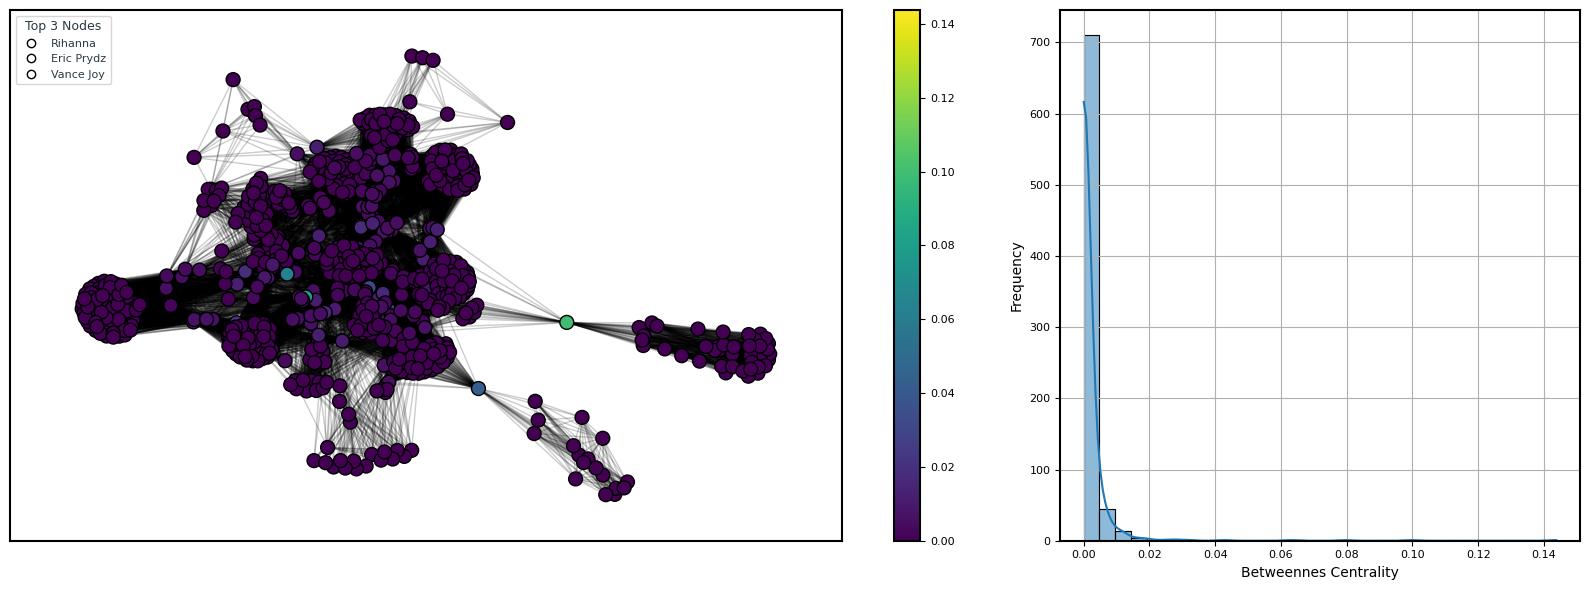

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_betweenness_centrality = nx.spring_layout(G, seed=42, k=0.3)
color = list(dict(betweenness_centrality).values())

nx.draw_networkx_edges(G, pos=pos_betweenness_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_betweenness_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_3_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
legend_handles = [
    mpl.lines.Line2D([0], [0], label=node, marker='o', markerfacecolor='w', markersize=6, markeredgecolor='black', linestyle='None')
    for node, _ in top_3_nodes
]
axes[0].legend(handles=legend_handles, title='Top 3 Nodes', loc='upper left', fontsize=8, frameon=True)

betweenness_centrality_values = list(betweenness_centrality.values())

sns.histplot(betweenness_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Betweennes Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/betweennes-centrality.png", transparent=True)
plt.show()

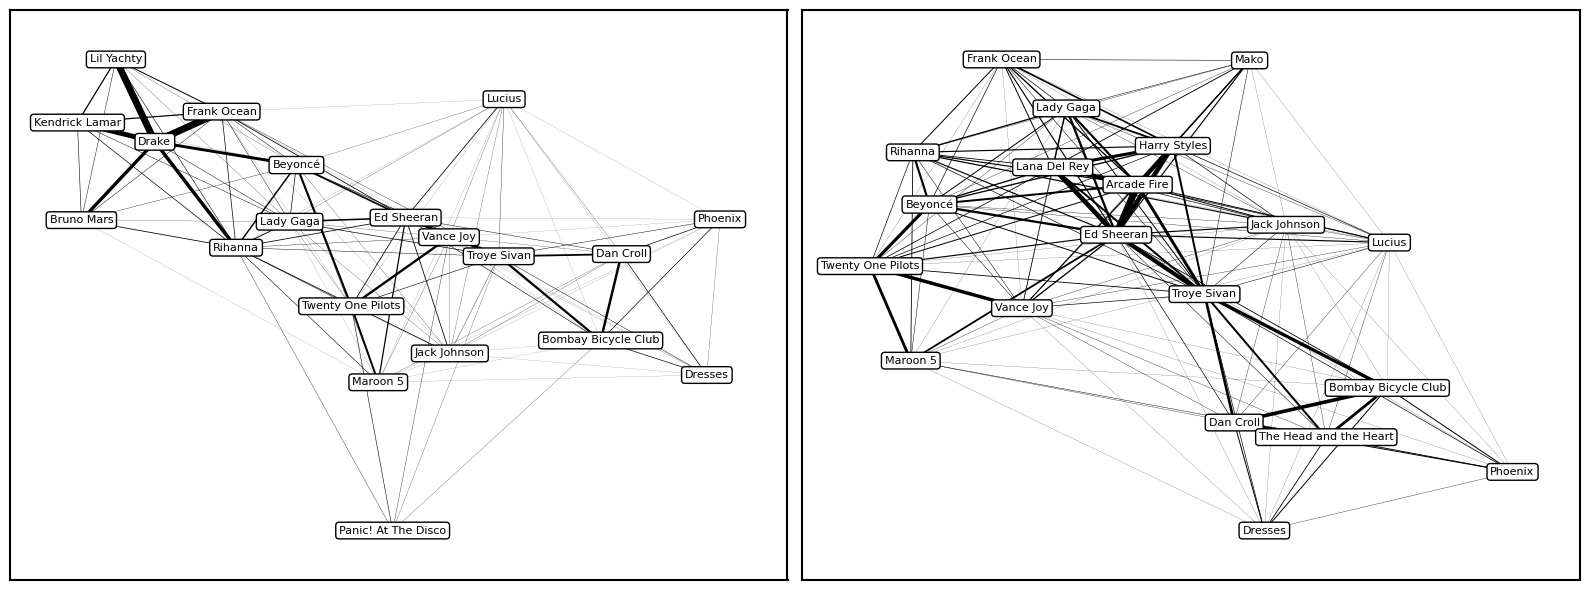

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

top_20_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_degree_centrality_subgraph = [node for node, _ in top_20_degree_centrality]
top_20_degree_centrality_subgraph = G.subgraph(top_20_degree_centrality_subgraph)

top_20_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_eigenvector_centrality_subgraph = [node for node, _ in top_20_eigenvector_centrality]
top_20_eigenvector_centrality_subgraph = G.subgraph(top_20_eigenvector_centrality_subgraph)

edge_weights_degree_centrality = [top_20_degree_centrality_subgraph[u][v]['weight'] for u, v in top_20_degree_centrality_subgraph.edges()]
max_weight_degree_centrality = max(edge_weights_degree_centrality) if edge_weights_degree_centrality else 1
normalized_weights_degree_centrality = [w / max_weight_degree_centrality * 5 for w in edge_weights_degree_centrality]

edge_weights_eigencentrality = [top_20_eigenvector_centrality_subgraph[u][v]['weight'] for u, v in top_20_eigenvector_centrality_subgraph.edges()]
max_weight_eigenvector_centrality = max(edge_weights_eigencentrality) if edge_weights_eigencentrality else 1
normalized_weights_eigenvector_centrality = [w / max_weight_eigenvector_centrality * 5 for w in edge_weights_eigencentrality]

pos_degree_centrality = nx.spring_layout(top_20_degree_centrality_subgraph, seed=42, k=0.3)
pos_weighted_degree_centrality = nx.spring_layout(top_20_eigenvector_centrality_subgraph, seed=42, k=0.3)

nx.draw_networkx_edges(top_20_degree_centrality_subgraph, pos_degree_centrality, edge_color='black', width=normalized_weights_degree_centrality, ax=axes[0])
nx.draw_networkx_labels(top_20_degree_centrality_subgraph, pos_degree_centrality, font_size=8, verticalalignment='center', ax=axes[0], bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

nx.draw_networkx_edges(top_20_eigenvector_centrality_subgraph, pos_weighted_degree_centrality, edge_color='black', width=normalized_weights_eigenvector_centrality, ax=axes[1])
nx.draw_networkx_labels(top_20_eigenvector_centrality_subgraph, pos_weighted_degree_centrality, font_size=8, verticalalignment='center', ax=axes[1], bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("../plots/top-20-degree-centrality.png", transparent=True)
plt.show()